In [3]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [60]:
# Ensure that data to be read is in the same working directory. 
df = pd.read_csv("DS1_C6_S3_BazilHousing_Data_Hackathon.csv") # read_csv: inbuilt function of pandas to read files

In [5]:
df.head() # head prints the top 5 rows 

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
df.tail() # tail returns the bottom 5 rows

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [7]:
print(df.shape) #returns a tuple of number of rows and columns

(10692, 13)


In [8]:
print(df.columns) # returns array of columns in dataset 

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [9]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [11]:
df.describe().T #it tells about the statistical summary about numerical column

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
floor,10692.0,5.067995,6.069050,0.0,1.00,3.0,8.0,301.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


In [12]:
a=num_df=df.select_dtypes(exclude='object')
b=cat_df=df.select_dtypes(include='object')
print(tabulate({"Categorical":b,"Continuous":a},headers=['Categorical','Continuous']))

Categorical    Continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [13]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Categorical \ Variables$$

In [14]:
info_of_cat("city") #function returns all the information required for the level 1 analysis

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


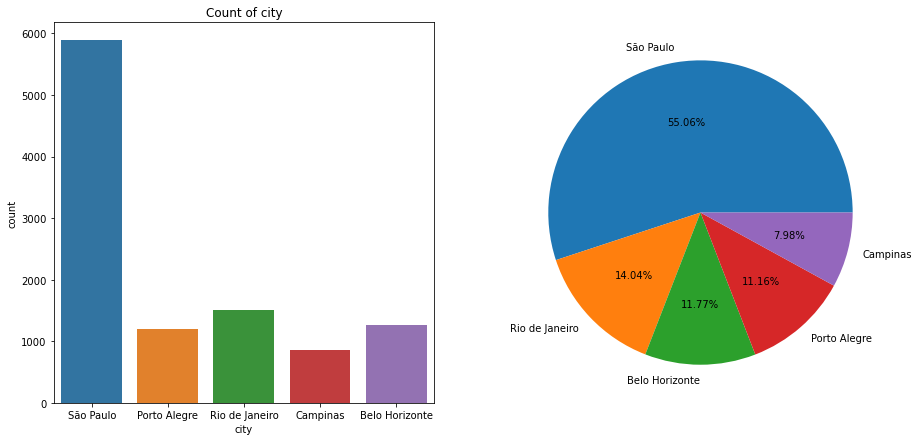

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of city")                  # Set the title of the graph
percentage = df["city"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["city"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# interpretation= São Paulo has the highest number of count 55.06% of total count and where as lowest is campinas 7.98%

In [16]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


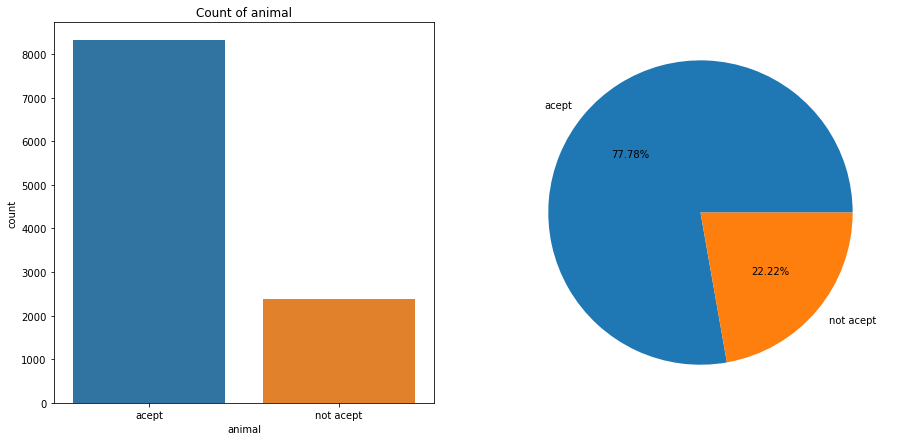

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of animal")                  # Set the title of the graph
percentage = df["animal"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["animal"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# interpretation=overall percentage of accepting the animal is 77.78%(around 8500) and not accepting animal is 22.22%(2500)

In [18]:
info_of_cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


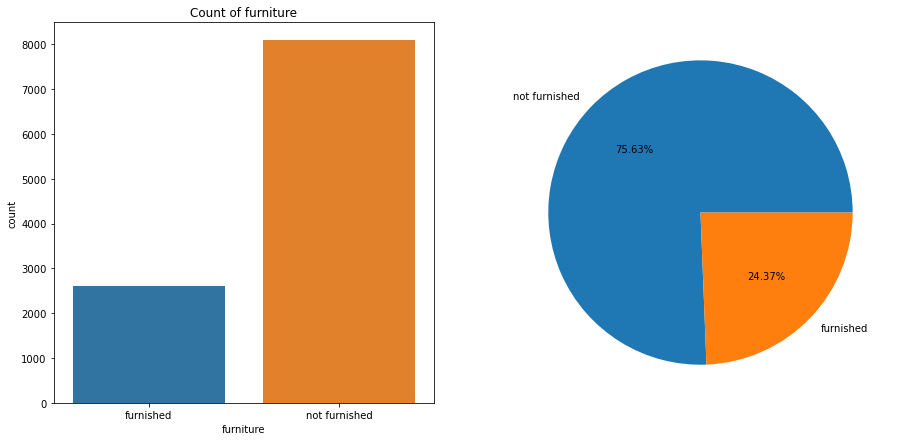

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of furniture")                  # Set the title of the graph
percentage = df["furniture"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["furniture"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# - interpretation=the overall view about the furnished city is 24.37% and 75.63% isnot furnished

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

In [20]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [21]:
a

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973
2,80,1,1,1,6,1000,2800,0,41,3841
3,51,2,1,0,2,270,1112,22,17,1421
4,25,1,1,0,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,1926
10688,285,4,4,4,17,3100,15000,973,191,19260
10689,70,3,3,0,8,980,6000,332,78,7390
10690,120,2,2,2,8,1585,12000,279,155,14020


In [22]:
info_of_numerical("area")

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0


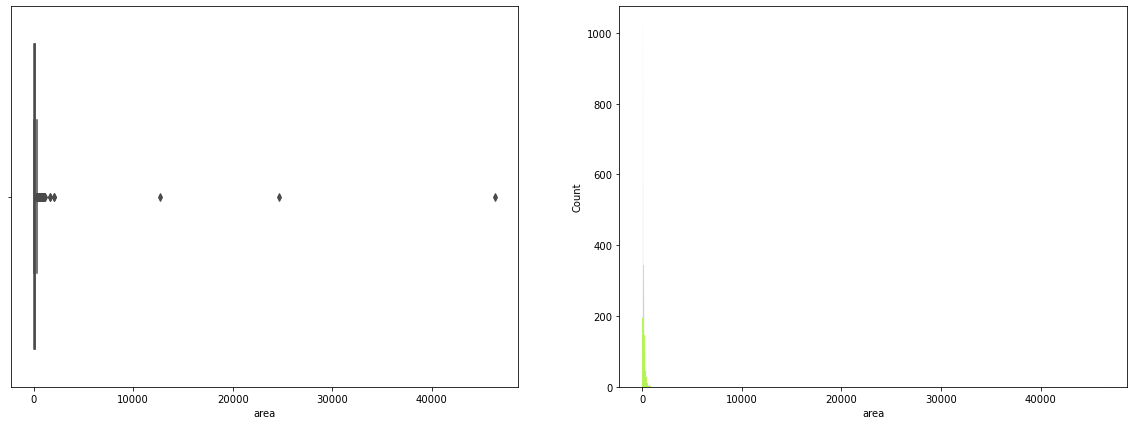

In [23]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["area"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["area"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# interpretation=The mean of the area is 149.21,The median of the area is 90.0,mode of the area is 50

In [24]:
info_of_numerical("rooms")

The mean of the rooms is 2.506079311634867
The median of the rooms is 2.0
The mode of the rooms is 3
The standard deviation of the rooms is 1.171266254098269
Number of missing values in the rooms is 0


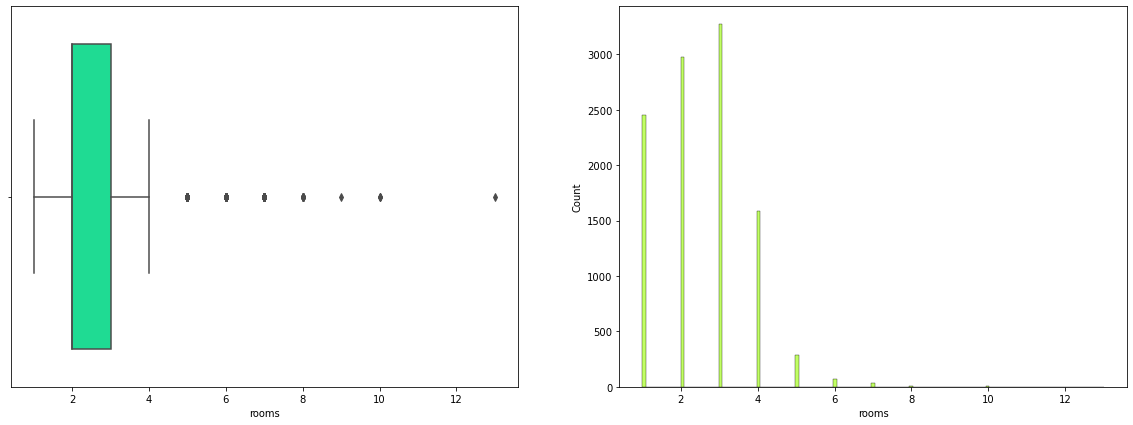

In [25]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["rooms"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["rooms"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# The mean of the rooms is 2.5,The median of the rooms is 2.0,mode of the rooms is 3
# here the number of rooms gradually increasing then we can see fall of count as the number of rooms incresing

In [26]:
info_of_numerical("bathroom")

The mean of the bathroom is 2.2368125701459034
The median of the bathroom is 2.0
The mode of the bathroom is 1
The standard deviation of the bathroom is 1.4071981983604243
Number of missing values in the bathroom is 0


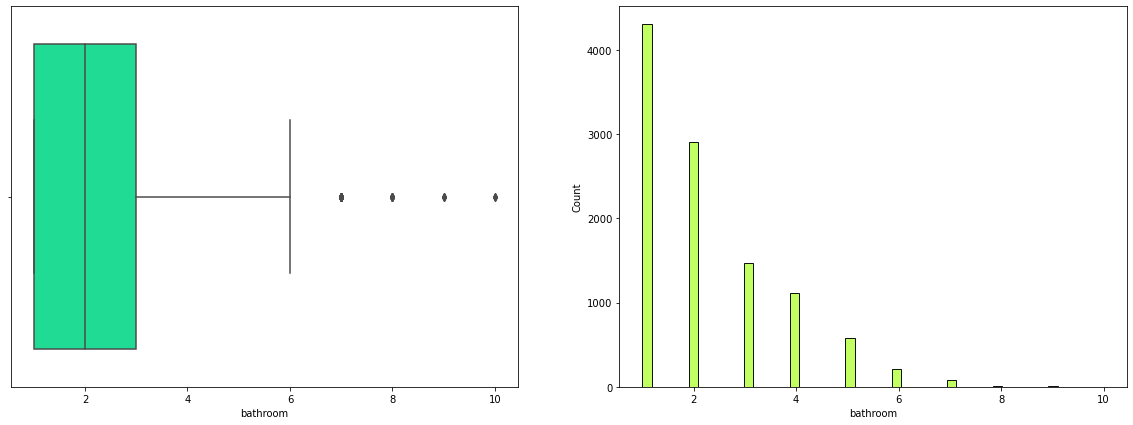

In [27]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["bathroom"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["bathroom"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# interpretation=The mean of the bathroom is 2.23,median of the bathroom is 2.0,mode of the bathroom is 1
# we can see that linear decrease in the count as the number of bathroom is increasing

In [28]:
info_of_numerical("parking spaces")

The mean of the parking spaces is 1.6091470258136924
The median of the parking spaces is 1.0
The mode of the parking spaces is 1
The standard deviation of the parking spaces is 1.5895207238054723
Number of missing values in the parking spaces is 0


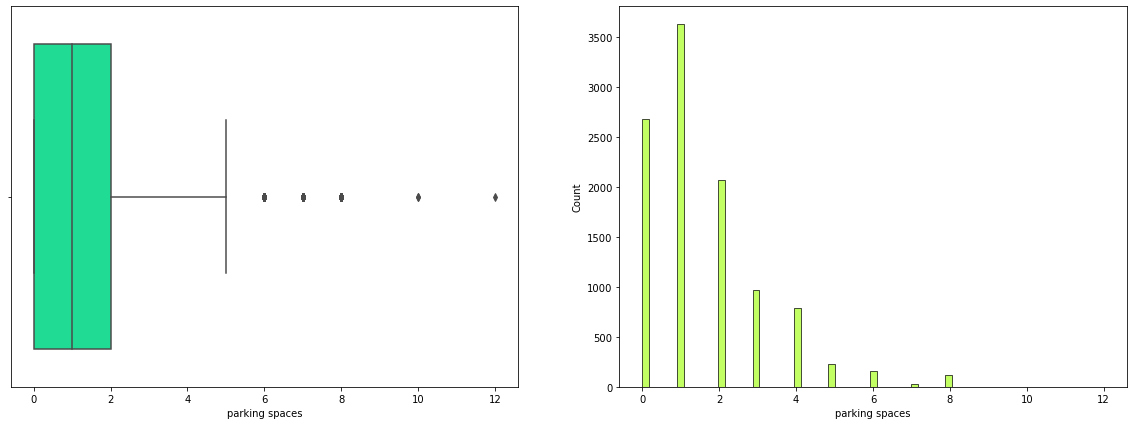

In [29]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["parking spaces"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["parking spaces"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# We can see that linear decrease in the count as the number of bathroom is increasing

In [30]:
info_of_numerical("floor")

The mean of the floor is 5.0679947624392065
The median of the floor is 3.0
The mode of the floor is 0
The standard deviation of the floor is 6.069050243218268
Number of missing values in the floor is 0


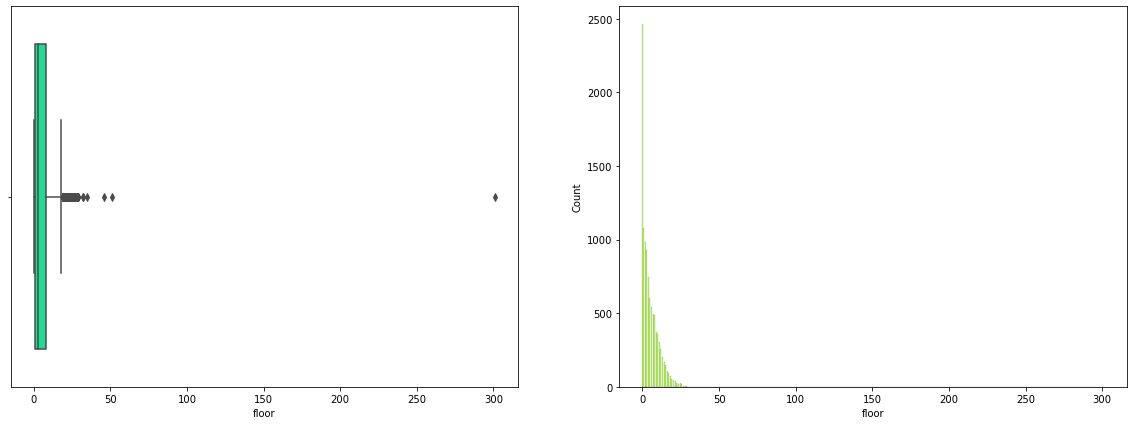

In [31]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["floor"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["floor"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# Graduall decrease in the count when the number of floors are increased

In [32]:
info_of_numerical("hoa (R$)")

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.305248403356
Number of missing values in the hoa (R$) is 0


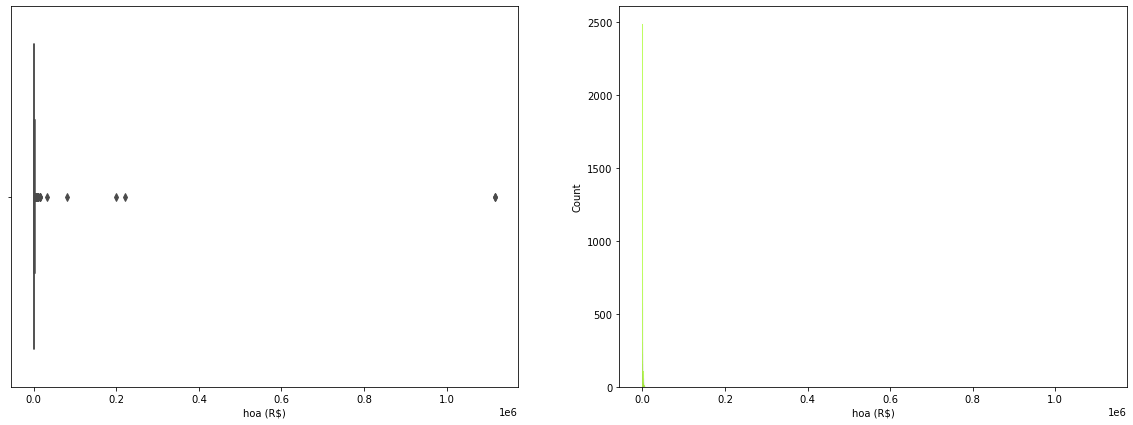

In [33]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["hoa (R$)"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["hoa (R$)"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

In [34]:
info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


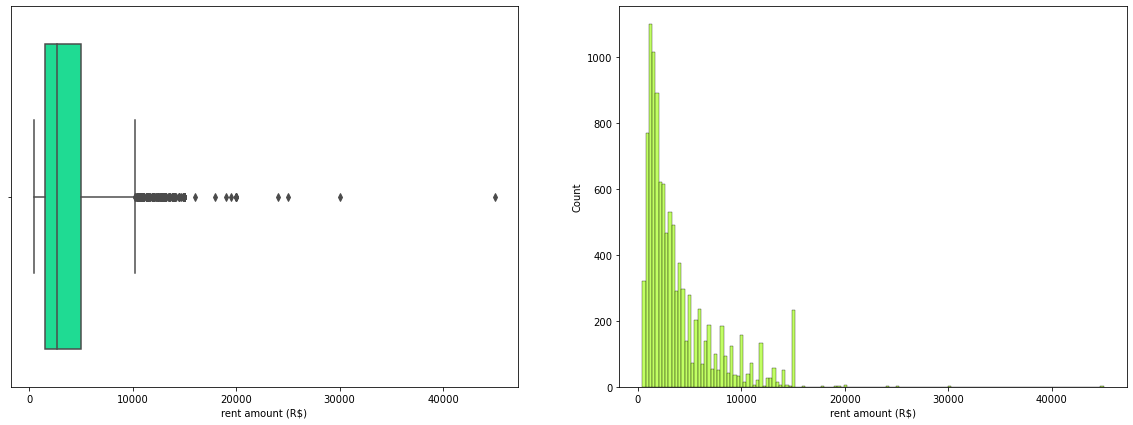

In [35]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["rent amount (R$)"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["rent amount (R$)"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# interpretation=we can see that sudden increase of count then gradually decreasing with respect to rent amout

In [36]:
info_of_numerical("property tax (R$)")

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917
Number of missing values in the property tax (R$) is 0


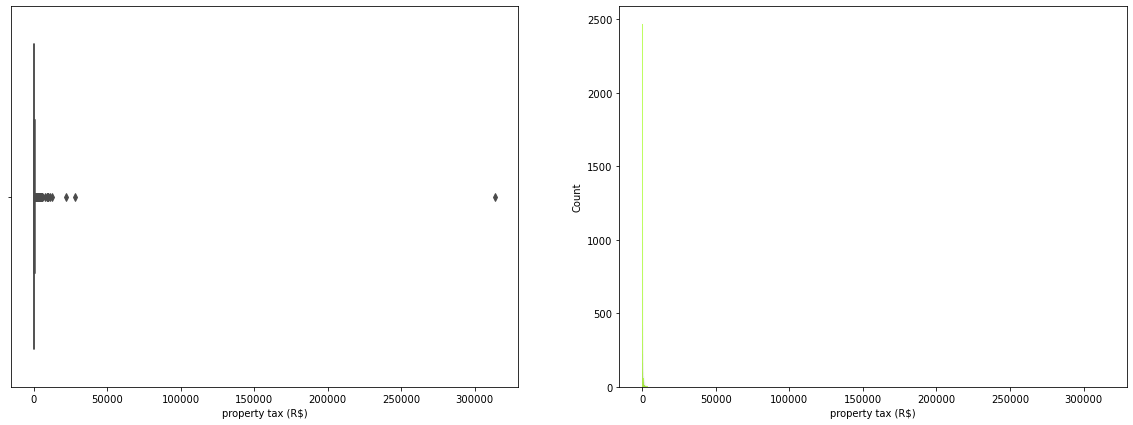

In [37]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["property tax (R$)"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["property tax (R$)"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

In [38]:
info_of_numerical("fire insurance (R$)")

The mean of the fire insurance (R$) is 53.300879161990274
The median of the fire insurance (R$) is 36.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 47.768030930197206
Number of missing values in the fire insurance (R$) is 0


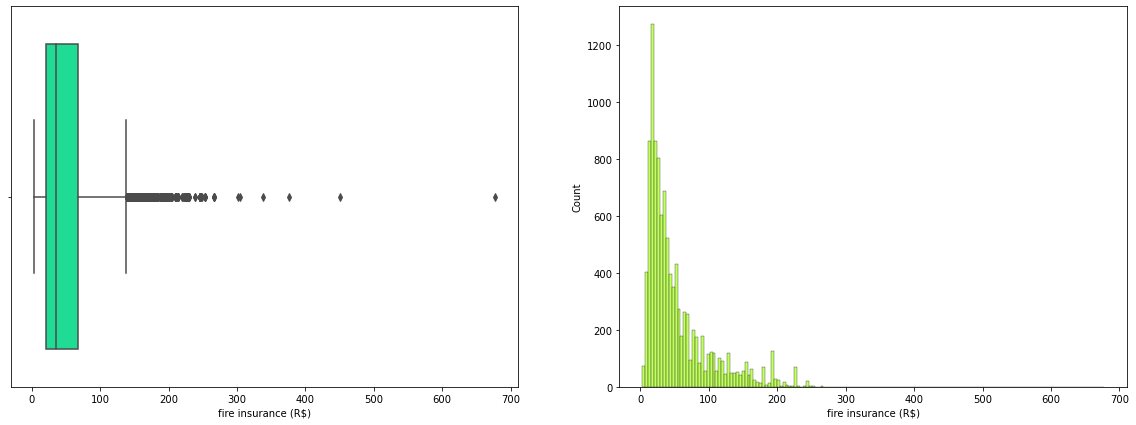

In [39]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["fire insurance (R$)"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["fire insurance (R$)"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# inrepretation=we can see that sudden increase of count then gradually decreasing with respect to fire insurence

In [40]:
info_of_numerical("total (R$)")

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027
Number of missing values in the total (R$) is 0


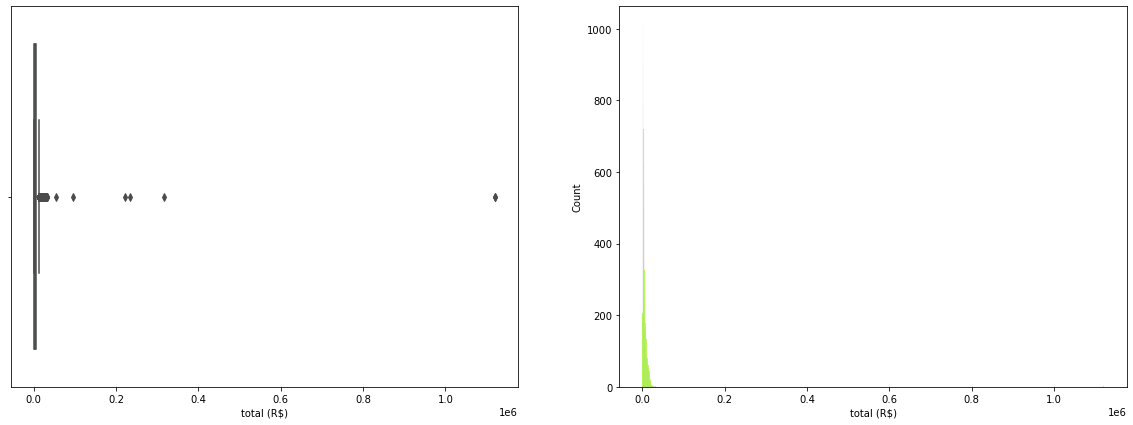

In [41]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["total (R$)"], ax =ax[1], color = "greenyellow") # ax[1] means image will plot at the second space
sns.boxplot(x = df["total (R$)"], ax = ax[0], color = "mediumspringgreen") # ax[0] means image will plot at the second space
plt.show()

# $$\;\;\;\;\;\;Bivariate \ Analysis \ of \ Categorical \ and \ Numerical \ Variables$$

CAT-CAT ANALYSIS  (relationship between categorical data)
-----------------------------------------------------------------------------------

In [42]:
a=num_df=df.select_dtypes(exclude='object')
b=cat_df=df.select_dtypes(include='object')
print(tabulate({"Categorical":b,"Continuous":a},headers=['Categorical','Continuous']))

Categorical    Continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


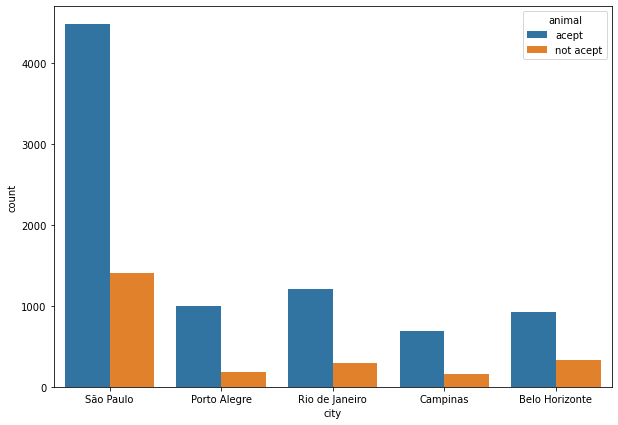

In [43]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "animal", data = df)
plt.show()

# interpretation=sao paulo has the greater number of accepting the animal as compared to other

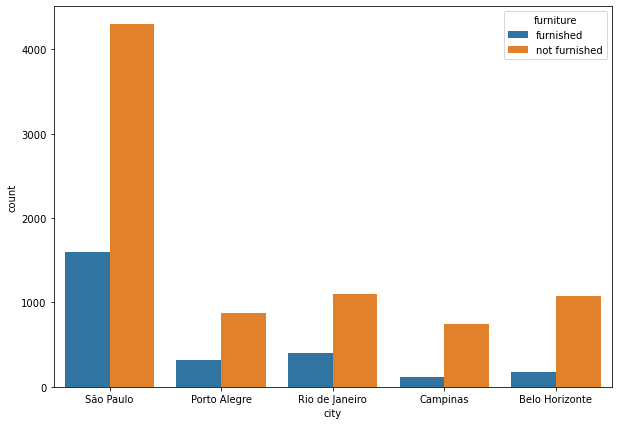

In [44]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "furniture", data = df)
plt.show()

# interpretation=sao paulo is the geater count of not furnished

CAT-NUM ANALYSIS (relationship between categorical and numerical data) 
-----------------------------------------------------------------------------------------------------------

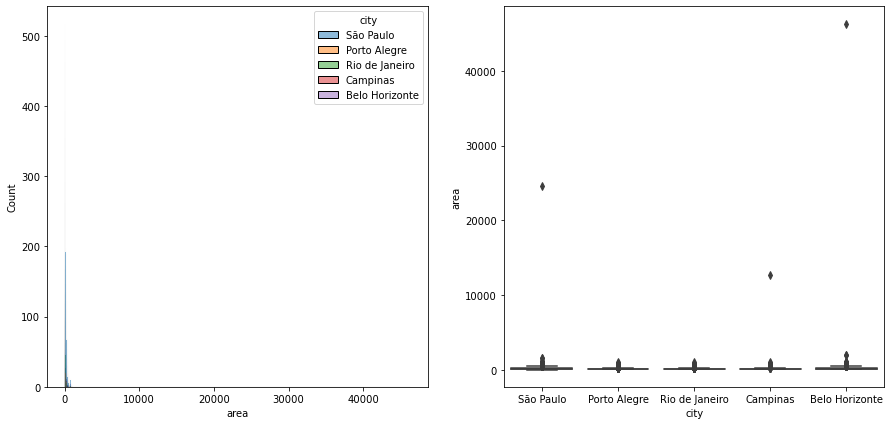

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["area"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["area"], x = df["city"], ax = ax[1])
plt.show()

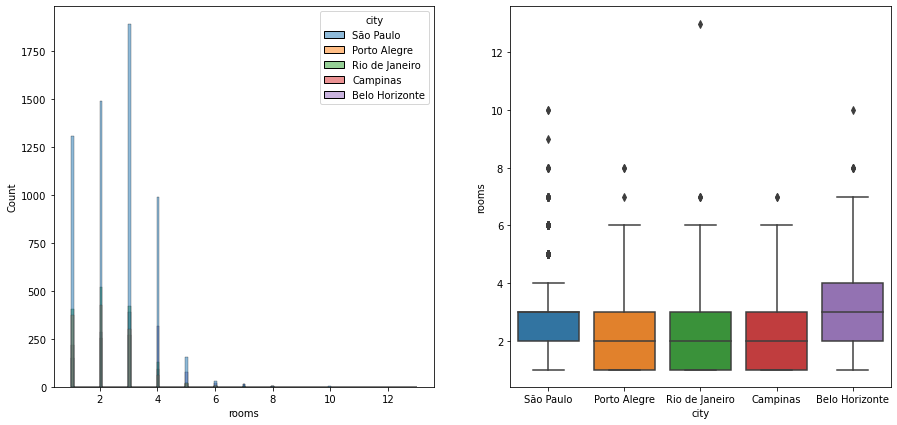

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["rooms"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["rooms"], x = df["city"], ax = ax[1])
plt.show()

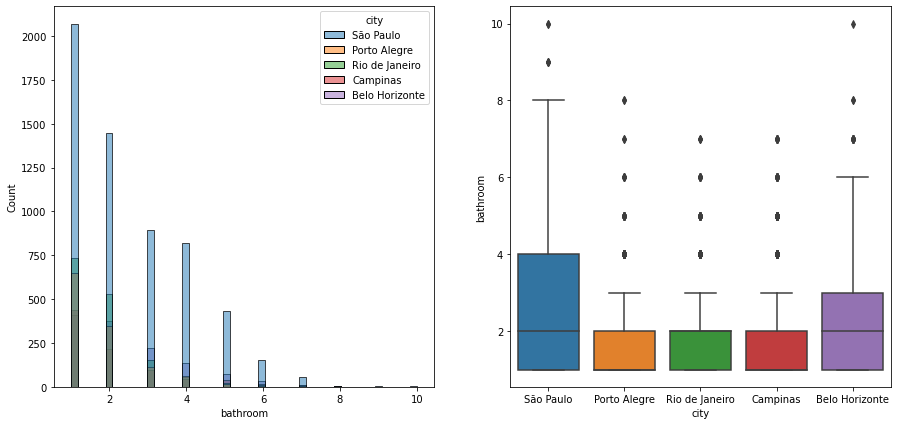

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["bathroom"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["bathroom"], x = df["city"], ax = ax[1])
plt.show()

# interpretation=sao paulo is the geater count of bathroom with an outlier

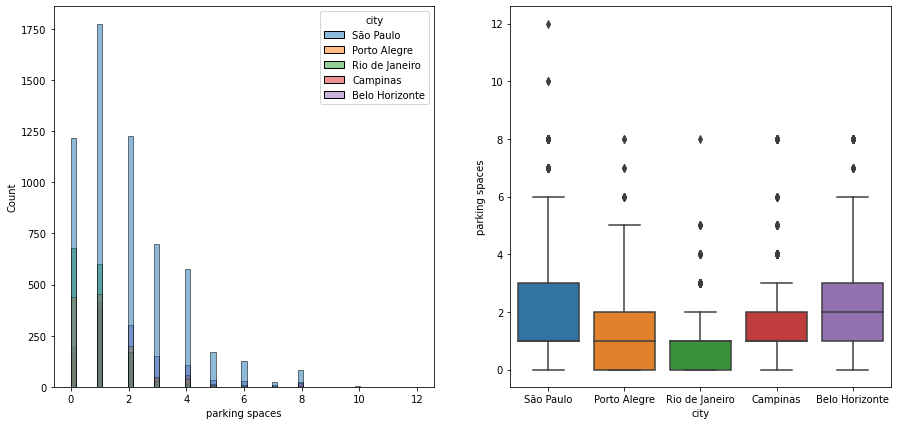

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["parking spaces"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["parking spaces"], x = df["city"], ax = ax[1])
plt.show()

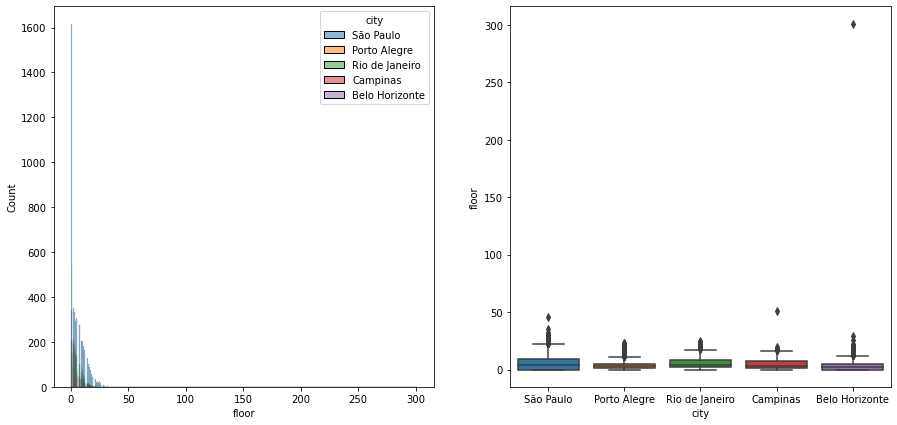

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["floor"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["floor"], x = df["city"], ax = ax[1])
plt.show()

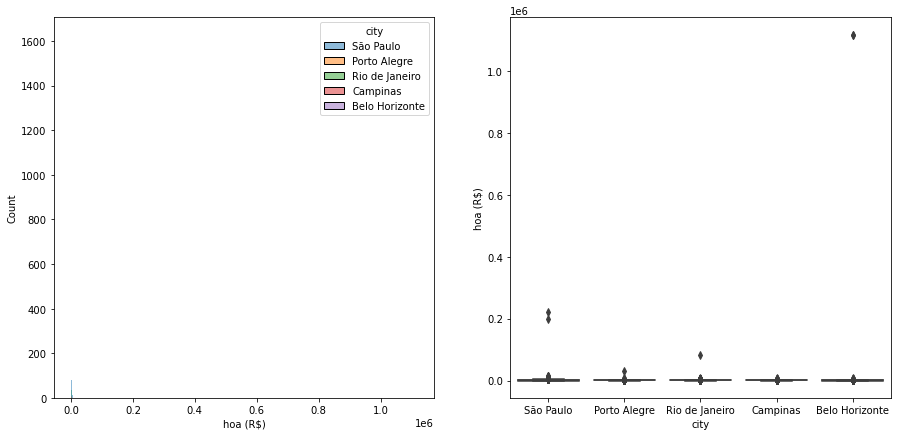

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["hoa (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["hoa (R$)"], x = df["city"], ax = ax[1])
plt.show()

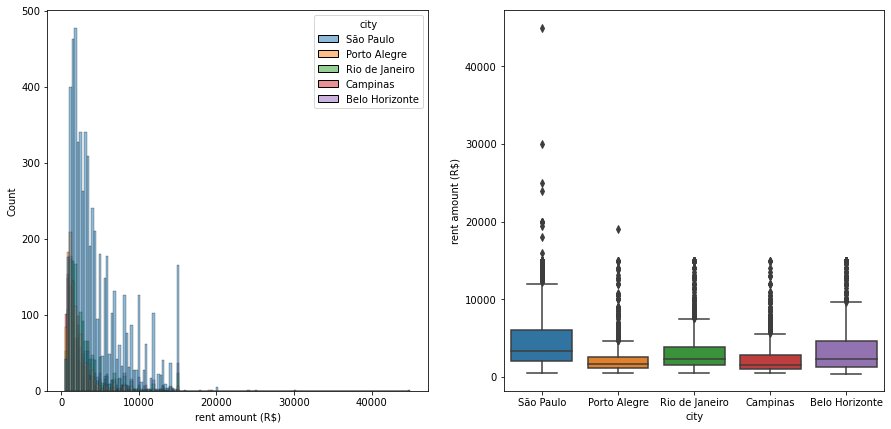

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["rent amount (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["rent amount (R$)"], x = df["city"], ax = ax[1])
plt.show()

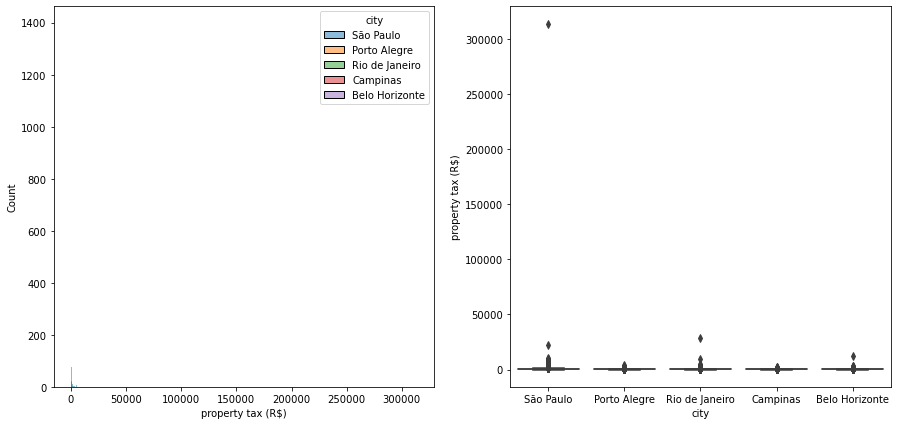

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["property tax (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["property tax (R$)"], x = df["city"], ax = ax[1])
plt.show()

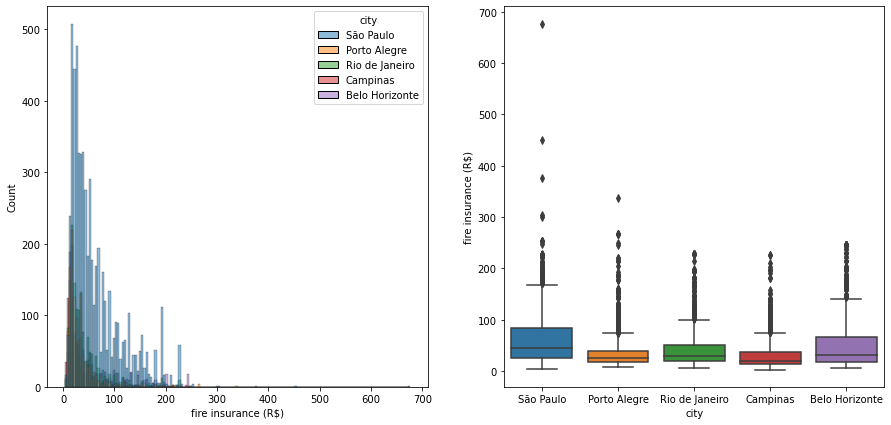

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["fire insurance (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["fire insurance (R$)"], x = df["city"], ax = ax[1])
plt.show()

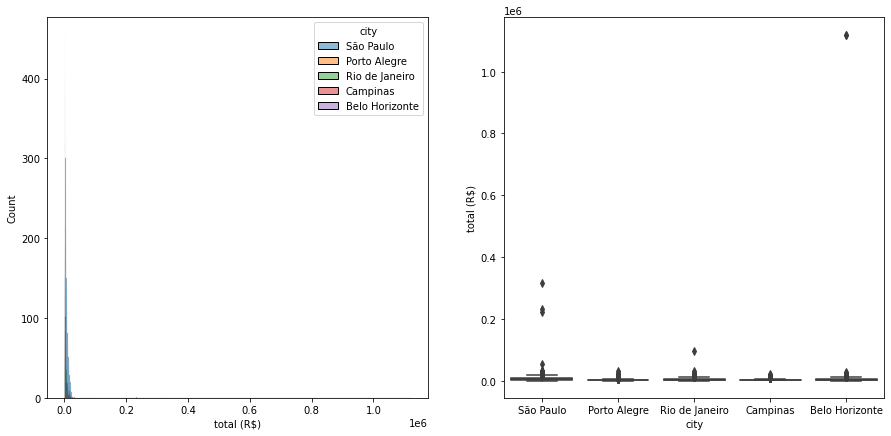

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["total (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["total (R$)"], x = df["city"], ax = ax[1])
plt.show()

# $$\;\;\;\;\;\;Multivariate \ Analysis \ of \ Categorical \ and \ Numerical \ Variables$$

In [55]:
a=num_df=df.select_dtypes(exclude='object')
b=cat_df=df.select_dtypes(include='object')
print(tabulate({"Categorical":b,"Continuous":a},headers=['Categorical','Continuous']))

Categorical    Continuous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [56]:
df.city

0             São Paulo
1             São Paulo
2          Porto Alegre
3          Porto Alegre
4             São Paulo
              ...      
10687      Porto Alegre
10688         São Paulo
10689    Rio de Janeiro
10690    Rio de Janeiro
10691         São Paulo
Name: city, Length: 10692, dtype: object

In [57]:
df=df[(df["furniture"]=="not furnished")].loc[:,["furniture","rooms","city"]]

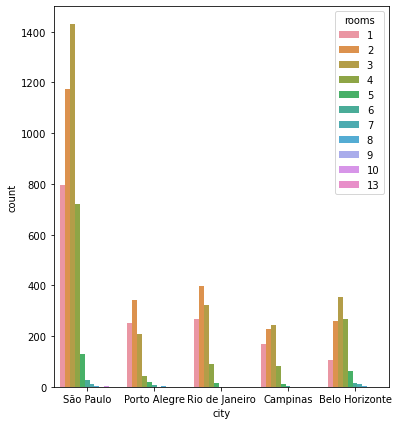

In [58]:
fig,ax=plt.subplots(figsize=(6,7))
sns.countplot(hue=df["rooms"],x=df["city"]);

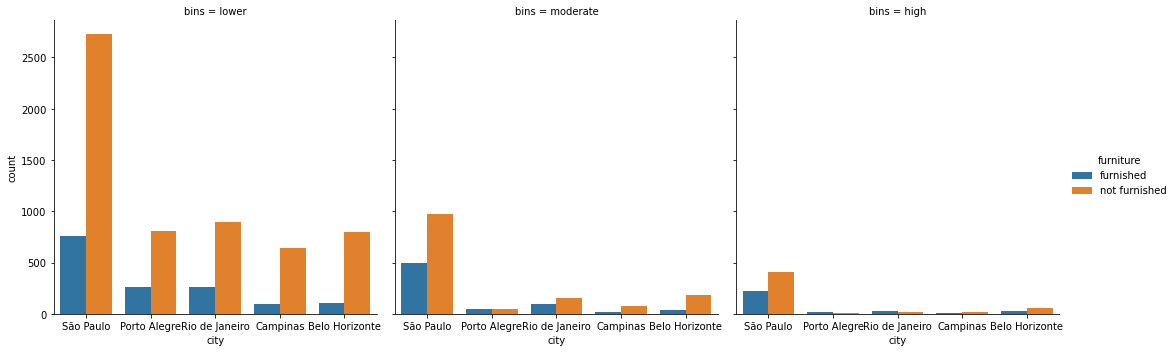

In [61]:
df['bins'] = pd.cut(x=df['rent amount (R$)'], bins=[499,4000,8000,12561],labels=['lower','moderate','high'])
sns.catplot(data=df,col = "bins",x="city",hue="furniture",kind="count")
plt.show()

## interpretation=sao paulo has more number of furnished houses in lower income category. Rio de janeiro and sao paulo are given as expensive cities so excluding these two cities

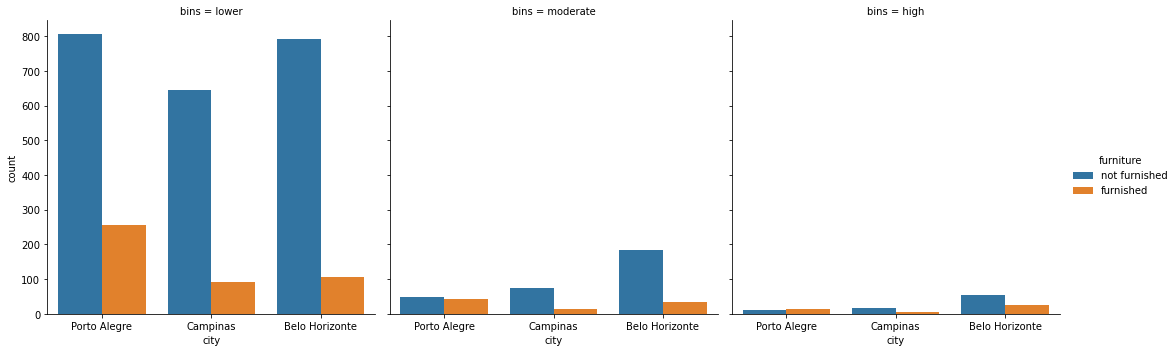

In [62]:
dfnew=df[(df.city != 'São Paulo')&(df.city != 'Rio de Janeiro')]

df['bins'] = pd.cut(x=df['rent amount (R$)'], bins=[499,4000,8000,12561],labels=['lower','moderate','high'])
sns.catplot(data=dfnew,col = "bins",x="city",hue = 'furniture',kind="count",height=5)

plt.show()

## interpretation=porto alegre has more number of furnished houses in lower income category.

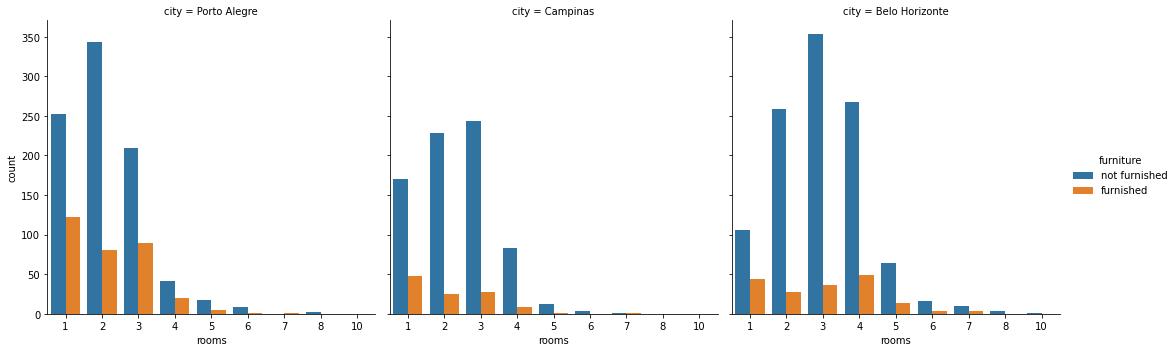

In [63]:
dfnew=df[(df.city != 'São Paulo')&(df.city != 'Rio de Janeiro')]
sns.catplot(data=dfnew,col = "city",x="rooms",hue = 'furniture',kind="count",height=5)

plt.show()

## interpretation=porto alegre has more number of houses which has 2,3,4 rooms which is furnished 

## Porto Alegre is most suitable city to relocate